# Import relevant  modules for file extraction

In [2]:
import pandas as pd

# Extract data into Data Frame

In [3]:
orders_df = pd.read_csv('C:\\Users\\rchauhan\\Desktop\\Springboard Materials\\Capstone Project Data\\orders.csv')
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
department_df = pd.read_csv('C:\\Users\\rchauhan\\Desktop\\Springboard Materials\\Capstone Project Data\\departments.csv')
department_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [5]:
product_df = pd.read_csv('C:\\Users\\rchauhan\\Desktop\\Springboard Materials\\Capstone Project Data\\products.csv')
product_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Understand the Orders data. 

In [6]:
#count user_ids for different evaluation set
count_eval_set = orders_df.groupby('eval_set').user_id.nunique()
count_eval_set

eval_set
prior    206209
test      75000
train    131209
Name: user_id, dtype: int64

In [7]:
#count order_ids for different evaluation set
count_eval_set = orders_df.groupby('eval_set').order_id.nunique()
count_eval_set

eval_set
prior    3214874
test       75000
train     131209
Name: order_id, dtype: int64

In [8]:
#count order_ids based on users
count_users = orders_df.groupby('user_id').count()['order_id']
count_users.sort_values(ascending = False).head()

user_id
26086     100
120897    100
122476    100
31118     100
1868      100
Name: order_id, dtype: int64

# Clean up Department and Product Data

In [9]:
#remove unwanted any extra blank spaces in the department field
department_df['department'] = department_df['department'].str.strip()

In [10]:
#remove any Null values in the department label
department_df.dropna(axis=0,how='any',subset=['department']).head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [11]:
#remove unwanted any extra blank spaces in the product field
product_df['product_name'] = product_df['product_name'].str.strip()

In [12]:
#remove any Null values in the product label
product_df.dropna(axis=0,how='any',subset=['product_name']).head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [13]:
product_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


# Checking if any Department or Product have any Null values

In [14]:
product_df[product_df['product_name'].isnull()].head()

,product_id,product_name,aisle_id,department_id


In [15]:
department_df[department_df['department'].isnull()]

,department_id,department


# Getting all Order & Product details

In [16]:
order_product_prior_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project Data\order_products__prior.csv')

In [17]:
order_product_train_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project Data\order_products__train.csv')


In [18]:
aisles_df = pd.read_csv(r'C:\Users\rchauhan\Desktop\Springboard Materials\Capstone Project Data\aisles.csv')


### This ends the initial exercise with the Capstone Project.

# Starting from below we will start Statistical Analysis on the Capstone Project

In [19]:
department_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [20]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [21]:
product_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [22]:
order_product_train_df['reordered'].unique()

array([1, 0], dtype=int64)

In [23]:
df = order_product_train_df[order_product_train_df['order_id']==98]
df['product_id'].unique().shape

(49,)

In [24]:
order_product_join_train = pd.merge(orders_df,order_product_train_df,how='inner',on='order_id')
order_product_join_train.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,1,1
1,1187899,1,train,11,4,8,14.0,25133,2,1
2,1187899,1,train,11,4,8,14.0,38928,3,1
3,1187899,1,train,11,4,8,14.0,26405,4,1
4,1187899,1,train,11,4,8,14.0,39657,5,1


In [25]:
order_product = pd.merge(order_product_join_train,product_df,how='inner',on='product_id')
order_product_department = pd.merge(order_product,department_df,how='inner',on='department_id')
order_product_department_aisle = pd.merge(order_product_department,aisles_df,how='inner',on='aisle_id')
order_product_department_aisle.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,department,aisle
0,1187899,1,train,11,4,8,14.0,196,1,1,Soda,77,7,beverages,soft drinks
1,2757217,67,train,25,0,11,5.0,196,1,1,Soda,77,7,beverages,soft drinks
2,632715,676,train,12,0,13,26.0,196,2,1,Soda,77,7,beverages,soft drinks
3,1167274,760,train,5,4,10,8.0,196,2,1,Soda,77,7,beverages,soft drinks
4,3347074,804,train,16,3,21,5.0,196,4,0,Soda,77,7,beverages,soft drinks


In [26]:
analysis_df = order_product_department_aisle[['user_id','order_id','product_name','department','aisle','order_dow','order_hour_of_day','days_since_prior_order','add_to_cart_order','reordered']]


In [27]:
df = analysis_df.groupby('department').count()['order_id'].reset_index()
df

,department,order_id
0,alcohol,5598
1,babies,14941
2,bakery,48394
3,beverages,114046
4,breakfast,29500
5,bulk,1359
6,canned goods,46799
7,dairy eggs,217051
8,deli,44291
9,dry goods pasta,38713


In [28]:
import numpy as np

In [29]:
import matplotlib.pyplot as plt

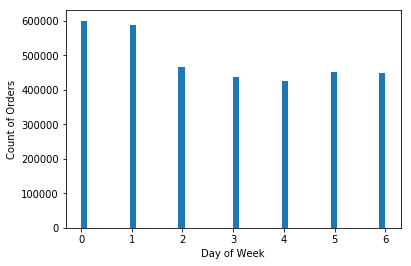

In [30]:
plt.hist(orders_df['order_dow'],bins = 50)
plt.xlabel('Day of Week')
plt.ylabel('Count of Orders')
plt.show()

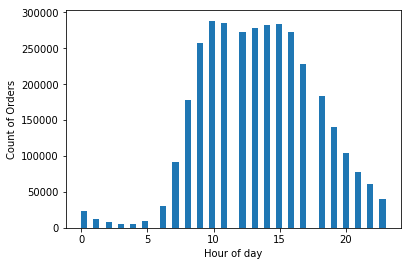

In [31]:
plt.hist(orders_df['order_hour_of_day'],bins = 50)
plt.xlabel('Hour of day')
plt.ylabel('Count of Orders')
plt.show()

In [32]:
analysis_df[analysis_df['department']=='bakery']['product_name'].unique()

array(['Soft Taco Size White Flour Tortillas',
       'Whole Wheat Pita Bread Loaves',
       '100% Whole Wheat Medium Soft Taco Flour Tortillas', ...,
       'Variety Cake Caramel Red Velvet Chocolate Carrot',
       'Halloween Vanilla Mini Cupcakes', 'Assorted Halloween Cupcakes'], dtype=object)

In [33]:
orders_df.head(10)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
5,3367565,1,prior,6,2,7,19.0
6,550135,1,prior,7,1,9,20.0
7,3108588,1,prior,8,1,14,14.0
8,2295261,1,prior,9,1,16,0.0
9,2550362,1,prior,10,4,8,30.0


In [34]:
order_product_prior_df[order_product_prior_df['order_id']==2]


,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
5,2,17794,6,1
6,2,40141,7,1
7,2,1819,8,1
8,2,43668,9,0


In [35]:
order_product_prior_df.groupby('product_id').sum()['reordered']

product_id
1         1136
2           12
3          203
4          147
5            9
6            3
7           12
8           83
9           82
10        1304
11          59
12         126
13           3
14           2
15           1
16           2
17           2
18          82
19           0
20           1
21           2
22          19
23         479
24           6
25        1391
26         247
27          77
28         369
29          81
30          37
         ...  
49659       55
49660        0
49661        9
49662       11
49663        3
49664       90
49665       53
49666        0
49667      878
49668      192
49669        2
49670      112
49671       39
49672        4
49673       11
49674       60
49675       38
49676       22
49677       72
49678      149
49679       40
49680      300
49681       39
49682       38
49683    67313
49684        1
49685        6
49686       84
49687        6
49688       15
Name: reordered, Length: 49677, dtype: int64

In [36]:
department_df[department_df['department_id']==3]
#product_df[product_df['product_name']=='Apple']

,department_id,department
2,3,bakery


In [37]:
department_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### Data for 1st analysis. Department with reordered numbers

In [38]:
df = analysis_df.groupby('department').sum()['reordered']
type(df)

pandas.core.series.Series

In [39]:
def test(var1):
    if var1 >= 4 & var1 < 12:
        return 'Morning'
    else:
        return 'Others'
    
    

In [41]:
a = analysis_df['order_hour_of_day']
morning = np.logical_and(a >= 4, a < 12)
afternoon = np.logical_and(a >= 12, a < 17)
evening = np.logical_and(a >= 17, a < 21)
night = np.logical_and(a >= 21, a < 24)

#analysis_df['hours_range'] = analysis_df[analysis_df[]]

In [42]:
a_df = analysis_df[['department','order_hour_of_day']]
b = analysis_df['order_hour_of_day'].head()
type(b) 

pandas.core.series.Series

In [55]:
a_df = analysis_df[['department','order_hour_of_day']]
#b = analysis_df['order_hour_of_day'].count()
#a_df
type(a_df)

pandas.core.frame.DataFrame

In [44]:
sorted(department_df['department'],reverse=True)

['snacks',
 'produce',
 'pets',
 'personal care',
 'pantry',
 'other',
 'missing',
 'meat seafood',
 'international',
 'household',
 'frozen',
 'dry goods pasta',
 'deli',
 'dairy eggs',
 'canned goods',
 'bulk',
 'breakfast',
 'beverages',
 'bakery',
 'babies',
 'alcohol']

In [82]:
a_df.head()

,department,order_hour_of_day
0,beverages,8
1,beverages,11
2,beverages,13
3,beverages,10
4,beverages,21


In [80]:
al_mor = a_df[(a_df.department == 'alcohol') & (a_df.order_hour_of_day >= 4) & (a_df.order_hour_of_day <12)]
mor = []
i = 0
while (i < len(al_mor['department'])):
    mor.append('morning')
    i = i+1
al_mor['hour_range'] = mor
al_mor

C:\Users\rchauhan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,department,order_hour_of_day,hour_range
1311261,alcohol,11,morning
1311267,alcohol,9,morning
1311271,alcohol,10,morning
1311273,alcohol,7,morning
1311279,alcohol,7,morning
1311282,alcohol,9,morning
1311288,alcohol,10,morning
1311295,alcohol,9,morning
1311305,alcohol,10,morning
1311317,alcohol,10,morning


In [77]:
al_mor = a_df[(a_df.department == 'alcohol') & (a_df.order_hour_of_day >= 4) & (a_df.order_hour_of_day <12)].head(5)
mor = []
i = 0
while (i < len(al_mor)):
    mor.append('morning')
    i = i+1
mor    

['morning', 'morning', 'morning', 'morning', 'morning']

In [49]:
analysis_df.loc[:,['user_id','order_id']].head()

,user_id,order_id
0,1,1187899
1,67,2757217
2,676,632715
3,760,1167274
4,804,3347074


In [54]:
a_df

department           1384617
order_hour_of_day    1384617
dtype: int64

In [62]:
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
df = pd.DataFrame(exam_data , index=labels)
df


,attempts,name,qualify,score
a,1,Anastasia,yes,12.5
b,3,Dima,no,9.0
c,2,Katherine,yes,16.5
d,3,James,no,NaN
e,2,Emily,no,9.0
f,3,Michael,yes,20.0
g,1,Matthew,yes,14.5
h,1,Laura,no,NaN
i,2,Kevin,no,8.0
j,1,Jonas,yes,19.0
